In [1]:
import matplotlib.pyplot as plt
import ezdxf
from shapely.geometry import LineString, Polygon, Point
import numpy as np
from scipy import spatial
from shapely import affinity

In [2]:
path="3DVESBUILDING_Reflected Ceiling Plan - LEVEL 01_02152022.dxf"
doc = ezdxf.readfile(path)
msp = doc.modelspace()

faces=[]
GridPoints = []
basePoints = []
i=0
j=0
names = []
spaces = []
for flag_ref in msp.query('HATCH'):
    name = flag_ref.dxf.pattern_name
    hatch_name =name.find('FP')
    hatch_layer=flag_ref.dxf.layer.find('CLNG')
    if hatch_name != -1 and hatch_layer != -1:
        patterns = flag_ref.pattern.lines
        paths = flag_ref.paths.default_paths()
        space = {"name":name,"FP_":[]}
        
        if len(patterns) == 2:
            for path in flag_ref.paths:
                face = {"face":[]}
                edges = path.edges
                plotface =[]
                for edge in edges:
                    point= []
                    b=edge.start
                    point.append(edge.start.x)
                    point.append(edge.start.y)
                    plotface.append(edge.start.x)
                    plotface.append(edge.start.y)
                    face["face"].append(point)

                space["FP_"].append(face)
        
            for pattern in patterns:
                
                angle = pattern.angle
                angle_dict = {"Angle":[]}
                angle_dict["Angle"].append(angle)
                space["FP_"].append(angle_dict)
            
                basePoint = {"BasePoint":[]}
                base_point_x = pattern.base_point.x
                base_point_y  = pattern.base_point.y
                base_point = [base_point_x,base_point_y]
                basePoint["BasePoint"].append(base_point)
                space["FP_"].append(basePoint)
        
        
                offset = {"Offset":[]}
                offset_x = pattern.offset.x
                offset_y = pattern.offset.y
                offset_point = [offset_x,offset_y]
                offset["Offset"].append(offset_point)
                space["FP_"].append(offset)
        
                point= []
                tr_point = {"TransltdPoint":[]}
                tr_point["TransltdPoint"].append([base_point_x+offset_x,base_point_y+offset_y])
                space["FP_"].append(tr_point)
            spaces.append(space)
            
        if len(patterns) != 2:
            for path in flag_ref.paths:
                face = {"face":[]}
                edges = path.edges
                plotface =[]
                for edge in edges:
                    point= []
                    b=edge.start
                    point.append(edge.start.x)
                    point.append(edge.start.y)
                    plotface.append(edge.start.x)
                    plotface.append(edge.start.y)
                    face["face"].append(point)

                space["FP_"].append(face)
        
            for pattern in patterns:
                
                angle_dict = {"Angle":[]}
                angle_dict["Angle"].append(None)
                space["FP_"].append(angle_dict)
            
                basePoint = {"BasePoint":[]}
                basePoint["BasePoint"].append(None)
                space["FP_"].append(basePoint)
        
        
                offset = {"Offset":[]}
                offset["Offset"].append(None)
                space["FP_"].append(offset)
        
                tr_point = {"TransltdPoint":[]}
                tr_point["TransltdPoint"].append([None])
                space["FP_"].append(tr_point)
                
jsonToMethod1 = spaces

27.312137150621908
21.937137150621922
17.8856932755004
17.885693275500387
17.885693275500373
17.88569327550038
17.885693275500365


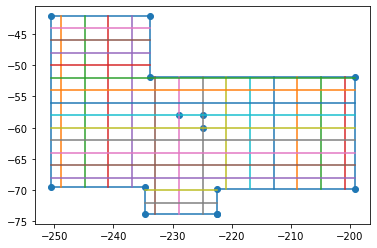

In [3]:
prueba = jsonToMethod1[5]['FP_'][0]['face']
     
xx = []
yy = []

for elemento in prueba:
    xx.append(elemento[0])
    yy.append(elemento[1])
    
xx.append(xx[0])
yy.append(yy[0])

poligono = Polygon(prueba)
latmin, lonmin, latmax, lonmax = poligono.bounds
points = []
plus = 5
refPoint = (-224.904,-57.98300000000001)
    
for lat in np.arange(latmin-plus, latmax+plus, 4):
    for lon in np.arange(lonmin-plus, lonmax+plus, 2):
        points.append((round(lat,4), round(lon,4)))
        
tree = spatial.KDTree(points)
result = tree.query(refPoint)

adjust = []
for element in points:
    add = affinity.translate(Point(element), xoff=((refPoint[0])-(points[result[1]][0])), yoff=((refPoint[1])-(points[result[1]][1])), zoff=0.0)
    adjust.append(add)
    
valid_points = []
valid_points.extend([m for m in adjust if poligono.contains(m)])

gridx = []
gridy = []
for p in valid_points:
    gridx.append(p.x)
    gridy.append(p.y)
    
#plt.scatter(gridx,gridy,marker='.')
plt.scatter((-224.904,-224.904,-228.904),(-57.98300000000001,-59.98300000000001,-57.98300000000001))
plt.plot(xx,yy,marker='o')

xses = []
yses = []
for element in valid_points:
    if element.x not in xses:
        xses.append(element.x)
    if element.y not in yses:
        yses.append(element.y)
        
lines = []
lines2 = []
for x1 in xses:
    lines.append(LineString([(x1, lonmin), (x1, lonmax)]))
for y1 in yses:
    lines2.append(LineString([(latmin, y1), (latmax, y1)]))
    
lenghts = []
for line in lines:
    line = poligono.intersection(line)
    x1 = line.bounds[0]
    y1 = line.bounds[1]
    x2 = line.bounds[2]
    y2 = line.bounds[3]
    plt.plot((x1,x2),(y1,y2))
    if line.length not in lenghts:
        lenghts.append(line.length)
        print(line.length)
    
for line in lines2:
    line = poligono.intersection(line)
    x1 = line.bounds[0]
    y1 = line.bounds[1]
    x2 = line.bounds[2]
    y2 = line.bounds[3]
    plt.plot((x1,x2),(y1,y2))
    #print(line.length)